In [6]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration-4').getOrCreate()

In [7]:
file_path = "trip_1.csv"
file1_path = "weather_1.csv"

In [8]:
df = spark.read.csv(file_path, header=True, inferSchema=True)
df_1 = spark.read.csv(file1_path, header=True, inferSchema=True)

In [9]:
df.printSchema()


root
 |-- trip_id: integer (nullable = true)
 |-- startdate: string (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stopdata: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- tripduration: double (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthyear: integer (nullable = true)



In [10]:
df_1.printSchema()

root
 |-- startdate: string (nullable = true)
 |-- Max_Temperature_F: integer (nullable = true)
 |-- Mean_Temperature_F: integer (nullable = true)
 |-- Min_TemperatureF: integer (nullable = true)
 |-- Max_Dew_Point_F: integer (nullable = true)
 |-- MeanDew_Point_F: integer (nullable = true)
 |-- Min_Dewpoint_F: integer (nullable = true)
 |-- Max_Humidity: integer (nullable = true)
 |-- Mean_Humidity: integer (nullable = true)
 |-- Min_Humidity: integer (nullable = true)
 |-- Max_Sea_Level_Pressure_In: double (nullable = true)
 |-- Mean_Sea_Level_Pressure_In: double (nullable = true)
 |-- Min_Sea_Level_Pressure_In: double (nullable = true)
 |-- Max_Visibility_Miles: integer (nullable = true)
 |-- Mean_Visibility_Miles: integer (nullable = true)
 |-- Min_Visibility_Miles: integer (nullable = true)
 |-- Max_Wind_Speed_MPH: integer (nullable = true)
 |-- Mean_Wind_Speed_MPH: integer (nullable = true)
 |-- Max_Gust_Speed_MPH: integer (nullable = true)
 |-- Precipitation_In: double (nullable

In [11]:
df.show(10)

+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|trip_id|startdate|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|
+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|      1| 1/1/2016|     0:36|1/1/2016|    0:48|SEA00480|     734.096|PATH / 9th Ave & ...|Summit Ave & E De...|         SLU-07|        CH-01|Short-Term Pass H...|     M|     null|
|      2| 1/1/2016|     0:43|1/1/2016|    0:54|SEA00392|     644.455|Bellevue Ave & E ...|Dexter Ave N & Al...|          CH-12|       SLU-02|              Member|  Male|     1982|
|      3| 1/1/2016|     0:47|1/1/2016|    1:05|SEA00276|    1078.579|Key Arena / 1st A...| 1st Ave &

In [12]:
df_1.show(10)

+---------+-----------------+------------------+----------------+---------------+---------------+--------------+------------+-------------+------------+-------------------------+--------------------------+-------------------------+--------------------+---------------------+--------------------+------------------+-------------------+------------------+----------------+---------+
|startdate|Max_Temperature_F|Mean_Temperature_F|Min_TemperatureF|Max_Dew_Point_F|MeanDew_Point_F|Min_Dewpoint_F|Max_Humidity|Mean_Humidity|Min_Humidity|Max_Sea_Level_Pressure_In|Mean_Sea_Level_Pressure_In|Min_Sea_Level_Pressure_In|Max_Visibility_Miles|Mean_Visibility_Miles|Min_Visibility_Miles|Max_Wind_Speed_MPH|Mean_Wind_Speed_MPH|Max_Gust_Speed_MPH|Precipitation_In|   Events|
+---------+-----------------+------------------+----------------+---------------+---------------+--------------+------------+-------------+------------+-------------------------+--------------------------+-------------------------+-------

In [13]:
df.show()

+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|trip_id|startdate|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|
+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|      1| 1/1/2016|     0:36|1/1/2016|    0:48|SEA00480|     734.096|PATH / 9th Ave & ...|Summit Ave & E De...|         SLU-07|        CH-01|Short-Term Pass H...|     M|     null|
|      2| 1/1/2016|     0:43|1/1/2016|    0:54|SEA00392|     644.455|Bellevue Ave & E ...|Dexter Ave N & Al...|          CH-12|       SLU-02|              Member|  Male|     1982|
|      3| 1/1/2016|     0:47|1/1/2016|    1:05|SEA00276|    1078.579|Key Arena / 1st A...| 1st Ave &

In [14]:
df.columns

['trip_id',
 'startdate',
 'starttime',
 'stopdata',
 'stoptime',
 'bikeid',
 'tripduration',
 'from_station_name',
 'to_station_name',
 'from_station_id',
 'to_station_id',
 'usertype',
 'gender',
 'birthyear']

In [15]:
df.describe().show()

+-------+------------------+---------+---------+--------+--------+--------+------------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|summary|           trip_id|startdate|starttime|stopdata|stoptime|  bikeid|      tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|         birthyear|
+-------+------------------+---------+---------+--------+--------+--------+------------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|  count|             48984|    48984|    48984|   48984|   48984|   48984|             48984|               48984|               48984|          48984|        48984|               48984| 48984|             31270|
|   mean|           24492.5|     null|     null|    null|    null|    null|1264.9614109709287|                null|                null|        

In [17]:
import matplotlib.pyplot as plt

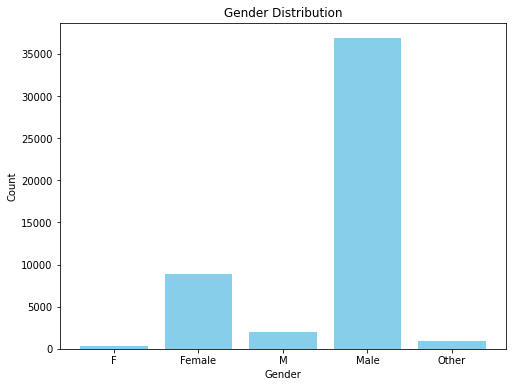

In [15]:
gender_counts = df.groupBy('gender').count().orderBy('gender')


gender_counts_pandas = gender_counts.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts_pandas['gender'], gender_counts_pandas['count'], color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

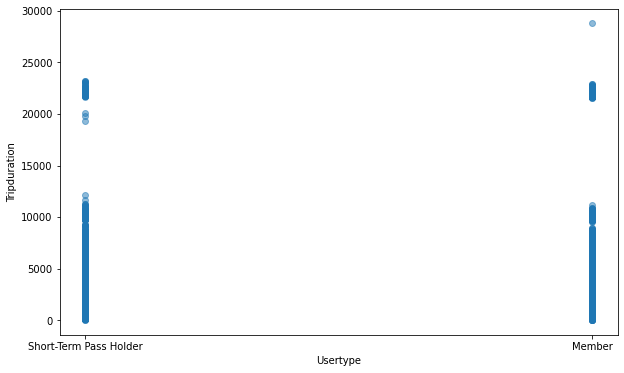

In [17]:
pandas_df = df.select('usertype', 'tripduration').toPandas()


plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['usertype'], pandas_df['tripduration'], alpha=0.5)
plt.xlabel('Usertype')
plt.ylabel('Tripduration')
plt.show()

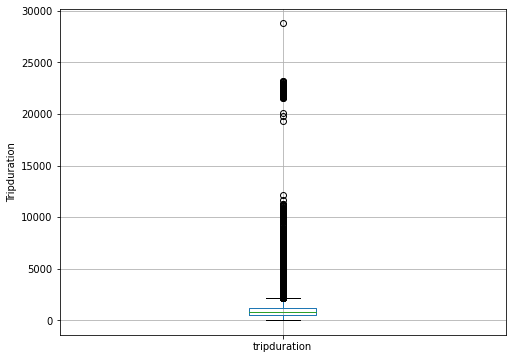

In [18]:
plt.figure(figsize=(8, 6))
pandas_df.boxplot(column='tripduration')

plt.ylabel('Tripduration')
plt.show()

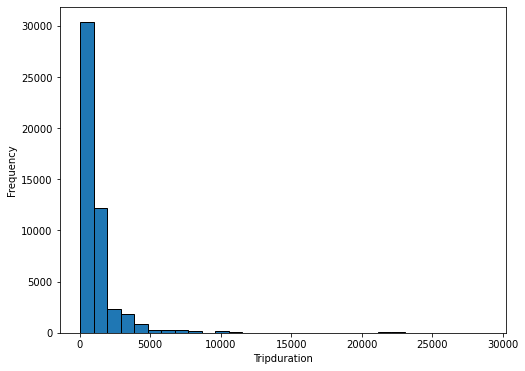

In [27]:
processed_df = df.select('tripduration')

pandas_df = processed_df.toPandas()

plt.figure(figsize=(8, 6))
plt.hist(pandas_df['tripduration'], bins=30, edgecolor='black')

plt.xlabel('Tripduration')
plt.ylabel('Frequency')
plt.show()

In [22]:
df.select('gender').show()

+------+
|gender|
+------+
|     M|
|  Male|
|  Male|
|  Male|
|  Male|
|  Male|
|Female|
|  Male|
|  Male|
|  Male|
|  Male|
|  Male|
|     M|
|  Male|
|  Male|
|     M|
|  Male|
|  Male|
|  Male|
|  Male|
+------+
only showing top 20 rows



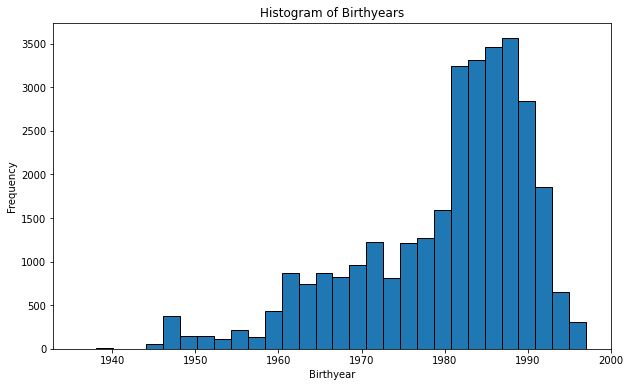

In [22]:
birthyear_column = df.select('birthyear').toPandas()

plt.figure(figsize=(10, 6))
plt.hist(birthyear_column['birthyear'], bins=30, edgecolor='black')
plt.title('Histogram of Birthyears')
plt.xlabel('Birthyear')
plt.ylabel('Frequency')
plt.show()

In [28]:
from pyspark.sql.functions import col, stddev, mean
from pyspark.sql.window import Window

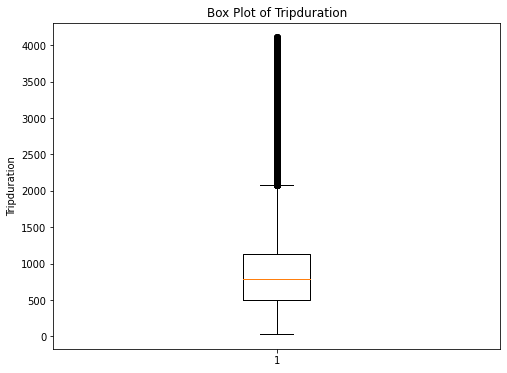

root
 |-- trip_id: integer (nullable = true)
 |-- startdate: string (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stopdata: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- tripduration: double (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthyear: integer (nullable = true)



In [32]:
tripduration_mean = df.select(mean('tripduration')).first()[0]
tripduration_stddev = df.select(stddev('tripduration')).first()[0]


threshold = 3
df_filtered = df.withColumn('tripduration_Zscore', (col('tripduration') - tripduration_mean) / tripduration_stddev) \
                .filter(col('tripduration_Zscore') <= threshold) \
                .drop('tripduration_Zscore')


tripduration_data = df_filtered.select('tripduration').toPandas()
plt.figure(figsize=(8, 6))
plt.boxplot(tripduration_data['tripduration'])
plt.title('Box Plot of Tripduration')
plt.ylabel('Tripduration')
plt.show()


df_filtered.printSchema()

In [51]:
tripduration_summary = df_filtered.select('tripduration').describe()


tripduration_summary.show()

+-------+-----------------+
|summary|     tripduration|
+-------+-----------------+
|  count|            46994|
|   mean|978.1282706090145|
| stddev| 746.543008735004|
|    min|            34.05|
|    max|         4104.885|
+-------+-----------------+



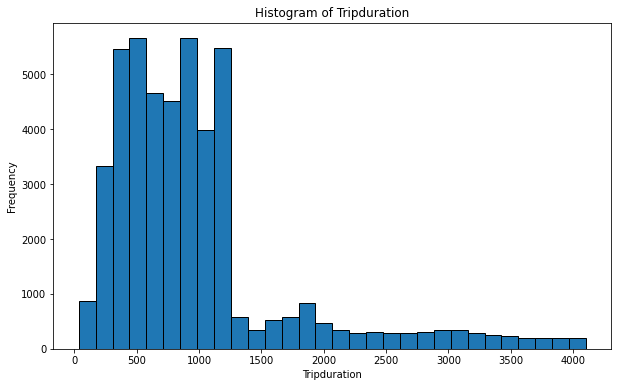

In [33]:
histogram_data = df_filtered.select('tripduration').toPandas()

plt.figure(figsize=(10, 6))
plt.hist(histogram_data['tripduration'], bins=30, edgecolor='black')
plt.title('Histogram of Tripduration')
plt.xlabel('Tripduration')
plt.ylabel('Frequency')
plt.show()

In [44]:
gender_counts = df_filtered.groupBy('gender').count()

gender_counts.show()

+------+-----+
|gender|count|
+------+-----+
|     F|  308|
|Female| 8586|
|     M| 1893|
| Other|  878|
|  Male|35329|
+------+-----+



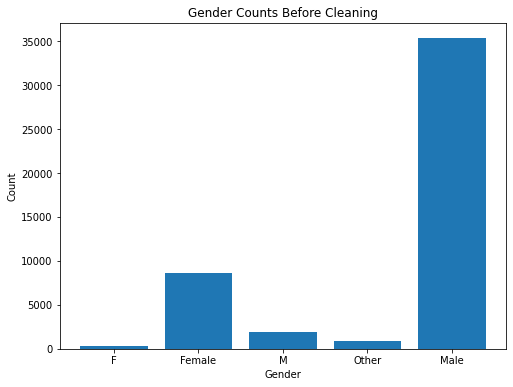

In [47]:
gender_counts_pd = gender_counts.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts_pd['gender'], gender_counts_pd['count'])
plt.title('Gender Counts Before Cleaning')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [48]:
from pyspark.sql.functions import when, count

In [49]:
df = df_filtered.withColumn('gender', 
                             when(col('gender') == 'F', 'Female')
                            .when(col('gender') == 'Female', 'Female')
                            .when(col('gender') == 'M', 'Male')
                            .when(col('gender') == 'Male', 'Male')
                            .otherwise(col('gender')))


gender_counts = df.groupBy('gender').agg(count('*').alias('count'))

gender_counts.show()


gender_counts_pd = gender_counts.toPandas()

+------+-----+
|gender|count|
+------+-----+
|Female| 8894|
| Other|  878|
|  Male|37222|
+------+-----+



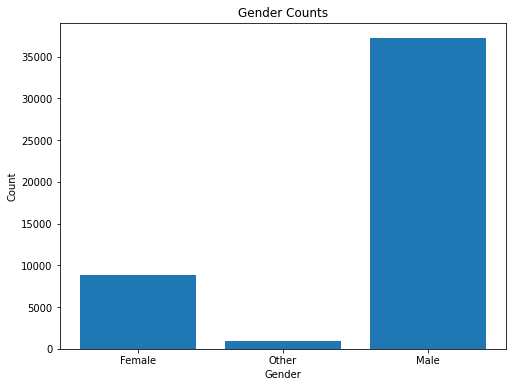

In [50]:
plt.figure(figsize=(8, 6))
plt.bar(gender_counts_pd['gender'], gender_counts_pd['count'])
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [53]:
mean_birthyear = df.select(mean('birthyear')).first()[0]
mean_birthyear = round(mean_birthyear)

df = df.withColumn('birthyear', when(col('birthyear').isNull(), mean_birthyear).otherwise(col('birthyear')))

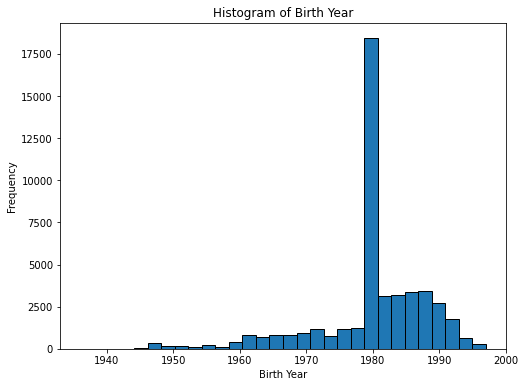

In [54]:
birthyear_data = df.select('birthyear').toPandas()

plt.figure(figsize=(8, 6))
plt.hist(birthyear_data['birthyear'], bins=30, edgecolor='black')
plt.title('Histogram of Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

In [55]:
df.describe().show()

+-------+------------------+---------+---------+--------+--------+--------+-----------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|summary|           trip_id|startdate|starttime|stopdata|stoptime|  bikeid|     tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|         birthyear|
+-------+------------------+---------+---------+--------+--------+--------+-----------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|  count|             46994|    46994|    46994|   46994|   46994|   46994|            46994|               46994|               46994|          46994|        46994|               46994| 46994|             46994|
|   mean| 23986.80955015534|     null|     null|    null|    null|    null|978.1282706090145|                null|                null|           nu

In [57]:
df = df.withColumn(
    "tripduration_Group",
    when((col("tripduration") >= 34) & (col("tripduration") < 2520), "Short")
    .when((col("tripduration") >= 2520) & (col("tripduration") <= 4105), "Long")
)


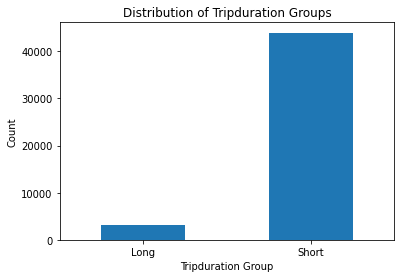

In [59]:
tripduration_grouped_df = df.groupBy("tripduration_Group").count()
tripduration_group_counts_pd = tripduration_grouped_df.toPandas()
tripduration_group_counts_pd.plot.bar(x='tripduration_Group', y='count', rot=0, legend=None)
plt.xlabel('Tripduration Group')
plt.ylabel('Count')
plt.title('Distribution of Tripduration Groups')
plt.show()


In [61]:
df.show()

+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+------------------+
|trip_id|startdate|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|tripduration_Group|
+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+------------------+
|      1| 1/1/2016|     0:36|1/1/2016|    0:48|SEA00480|     734.096|PATH / 9th Ave & ...|Summit Ave & E De...|         SLU-07|        CH-01|Short-Term Pass H...|  Male|     1980|             Short|
|      2| 1/1/2016|     0:43|1/1/2016|    0:54|SEA00392|     644.455|Bellevue Ave & E ...|Dexter Ave N & Al...|          CH-12|       SLU-02|              Member|  Male|     1982|             Short|
|    

In [71]:
joined_df = df.join(df_1, on='startdate', how='inner')
joined_df.show(3)
joined_row_count = joined_df.count()
print("joined_row:", joined_row_count)
joined_column_count = len(joined_df.columns)
print("joined_column:", joined_column_count)

+---------+-------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+------------------+-----------------+------------------+----------------+---------------+---------------+--------------+------------+-------------+------------+-------------------------+--------------------------+-------------------------+--------------------+---------------------+--------------------+------------------+-------------------+------------------+----------------+------+
|startdate|trip_id|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|tripduration_Group|Max_Temperature_F|Mean_Temperature_F|Min_TemperatureF|Max_Dew_Point_F|MeanDew_Point_F|Min_Dewpoint_F|Max_Humidity|Mean_Humidity|Min_Humidity|Max_Sea_Level_Pressure_In|Mean_Sea_Level_Pressure_In|Min_Sea_Level_Pressure_In|Max_Visibility_Mi

In [74]:
select_columns = ['tripduration_Group', 'usertype', 'gender', 'birthyear', 
                   'Mean_Temperature_F', 'Mean_Humidity', 'Precipitation_In', 'Events']

df_2 = joined_df.select(select_columns)

selected_row_count = df_2.count()
print("selected_row:", selected_row_count)
selected_column_count = len(selected_joined_df.columns)
print("selected_column:", selected_column_count)

selected_row: 46994
selected_column: 8
